# Data Mining

## Imports and Readings

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedKFold, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from lime.lime_tabular import LimeTabularExplainer
from PIL import Image

In [7]:
path = "C:/Users/termi/Desktop/preprocessed_data.csv"
data = pd.read_csv(path)

In [8]:
data.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ChurnRiskScore
0,7590-VHVEG,0,1,0,0.233075,2,0,0,1,1,4,0.329114,0.009923,0,0.005586
1,5575-GNVDE,0,0,0,0.477168,2,1,0,2,1,3,0.442713,0.239253,0,0.000936
2,3668-QPYBK,0,1,0,0.240472,2,0,0,1,1,1,0.423364,0.010542,1,0.001269
3,7795-CFOCW,0,0,0,0.558532,2,1,1,2,1,2,0.351273,0.233113,0,0.000485
4,9237-HQITU,0,0,0,0.240472,1,0,0,1,1,3,0.528535,0.016968,1,0.004031


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7030 entries, 0 to 7029
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7030 non-null   object 
 1   SeniorCitizen     7030 non-null   int64  
 2   Partner           7030 non-null   int64  
 3   Dependents        7030 non-null   int64  
 4   tenure            7030 non-null   float64
 5   InternetService   7030 non-null   int64  
 6   OnlineSecurity    7030 non-null   int64  
 7   TechSupport       7030 non-null   int64  
 8   Contract          7030 non-null   int64  
 9   PaperlessBilling  7030 non-null   int64  
 10  PaymentMethod     7030 non-null   int64  
 11  MonthlyCharges    7030 non-null   float64
 12  TotalCharges      7030 non-null   float64
 13  Churn             7030 non-null   int64  
 14  ChurnRiskScore    7030 non-null   float64
dtypes: float64(4), int64(10), object(1)
memory usage: 824.0+ KB


In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7030.0,0.162873,0.369276,0.0,0.000000,0.000000,0.000000,1.0
Partner,7030.0,0.480654,0.499661,0.0,0.000000,0.000000,1.000000,1.0
Dependents,7030.0,0.307681,0.461567,0.0,0.000000,0.000000,1.000000,1.0
tenure,7030.0,0.464690,0.176303,0.0,0.307043,0.447581,0.610309,1.0
InternetService,7030.0,1.127312,0.742109,0.0,1.000000,1.000000,2.000000,2.0
OnlineSecurity,7030.0,0.284780,0.451341,0.0,0.000000,0.000000,1.000000,1.0
TechSupport,7030.0,0.288905,0.453286,0.0,0.000000,0.000000,1.000000,1.0
Contract,7030.0,1.683499,0.833294,1.0,1.000000,1.000000,2.000000,3.0
PaperlessBilling,7030.0,0.595875,0.490757,0.0,0.000000,1.000000,1.000000,1.0
PaymentMethod,7030.0,2.678947,1.148671,1.0,2.000000,3.000000,4.000000,4.0


<AxesSubplot:>

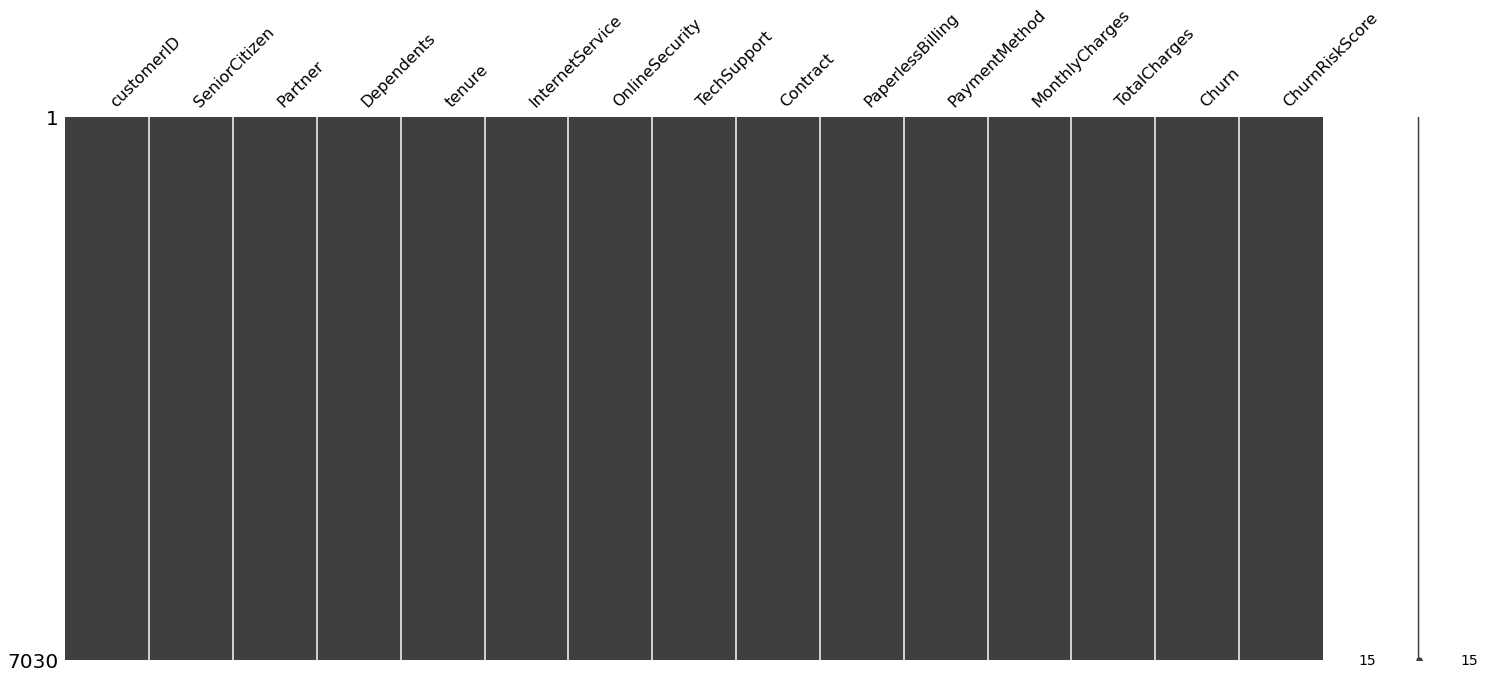

In [11]:
msno.matrix(data)

## Trying Different Algorithms

### Train/Test Split

In [46]:
# Define features and target variable
features_to_drop = ["customerID", "Churn"]
target_variable = 'Churn'

# Identify features (X) and target variable (y)
X = data.drop(features_to_drop, axis=1)
y = data[target_variable]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

### Create Methods for Storing and Visualizing Results

In [104]:
# Initialize an empty list to store results
results_list = []

In [114]:
# Function to add results to the list
def add_results(model_name, accuracy, conf_matrix, classification_rep, best_estimator):
    results_list.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Confusion Matrix': conf_matrix,
        'Classification Report': classification_rep,
        'Best Estimator': best_estimator
    })

# Visualize results
def visualize_results(results_list):
    models = [result['Model'] for result in results_list]
    accuracies = [result['Accuracy'] for result in results_list]

    # Plot the horizontal bar chart
    plt.barh(models, accuracies, color=['blue', 'orange', 'green'])  # Add more colors as needed
    plt.xlabel('Accuracy')
    plt.title('Model Accuracy Comparison')
    plt.xlim(0.75, 0.8)  # Adjust the x-axis limits as needed
    plt.show()
    
    # Define a list of colors for each model
    colors = ['Blues', 'Oranges', 'Greens']

    # Plot confusion matrices with different colors
    fig, axes = plt.subplots(1, len(results_list), figsize=(20, 5))

    for i, result in enumerate(results_list):
        model_name = result['Model']
        conf_matrix = result['Confusion Matrix']
        color = colors[i]

        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=color, ax=axes[i])
        axes[i].set_title(model_name)

    plt.show()
    
    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Loop through each model in results_list
    for result in results_list:
        model_name = result['Model']
        accuracy = result['Accuracy']
        conf_matrix = result['Confusion Matrix']
        classification_rep = result['Classification Report']
        best_estimator = result['Best Estimator']

        # LIME Explanation
        explainer = LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['No Churn', 'Churn'])
        explanation = explainer.explain_instance(X_test.iloc[0].values, best_estimator.predict_proba, num_features=len(X_train.columns))

        # Plot LIME explanation
        fig = explanation.as_pyplot_figure()
        fig.patch.set_facecolor('white')
        ax1.imshow(fig)

        # ROC Curve
        fpr, tpr, _ = roc_curve(y_test, best_estimator.predict_proba(X_test)[:, 1])
        roc_auc = auc(fpr, tpr)

        # Plot ROC Curve
        roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, auc=roc_auc, estimator_name=model_name)
        roc_display.plot(ax=ax2)

    # Set titles and show the plot
    ax1.set_title('LIME Explanation')
    ax2.set_title('ROC Curve Comparison')
    plt.show()

### Logistic Regression

#### Using Libraries to Apply Logistic Regression With GridSearch Performance Improver

In [95]:
# Create logistic regression model
logreg_model = LogisticRegression(random_state=69)

# Define the hyperparameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'],
    'penalty': ['l2'],  # Use only 'l2' penalty for solvers that don't support 'l1'
    'max_iter': [100, 200, 300],  # Maximum number of iterations
}

# Create the grid search object
grid_search = GridSearchCV(logreg_model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator from the grid search
best_params_lr = grid_search.best_params_
best_estimator_lr = grid_search.best_estimator_

# Use the best estimator to make predictions on the test set
y_pred = best_estimator_lr.predict(X_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred)
conf_matrix_lr = confusion_matrix(y_test, y_pred)
classification_rep_lr = classification_report(y_test, y_pred)

# Print results
print(f"Best Parameters: {best_params_lr}")
print(f"Accuracy: {accuracy_lr:.4f}")
print("\nConfusion Matrix:\n", conf_matrix_lr)
print("\nClassification Report:\n", classification_rep_lr)

The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the

Best Parameters: {'C': 100, 'max_iter': 100, 'penalty': 'l2', 'solver': 'sag'}
Accuracy: 0.7817

Confusion Matrix:
 [[949  95]
 [212 150]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1044
           1       0.61      0.41      0.49       362

    accuracy                           0.78      1406
   macro avg       0.71      0.66      0.68      1406
weighted avg       0.76      0.78      0.77      1406



In [105]:
# Add results
add_results('Logistic Regression', accuracy_lr, conf_matrix_lr, classification_rep_lr, best_estimator_lr)

#### Feature Importance Table for Library Algorithm

In [43]:
# Extract coefficients and odds ratios
coefficients = best_estimator_lr.coef_[0]
odds_ratios = np.exp(coefficients)

# Create a DataFrame to display feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients, 'Odds Ratio': odds_ratios})
feature_importance = feature_importance.sort_values(by='Odds Ratio', ascending=False)

# Display feature importance
print("\nFeature Importance:")
feature_importance


Feature Importance:


,Feature,Coefficient,Odds Ratio
10,MonthlyCharges,4.254073,70.391546
12,ChurnRiskScore,1.606321,4.984441
8,PaperlessBilling,0.537687,1.712043
0,SeniorCitizen,0.335785,1.399039
9,PaymentMethod,0.198931,1.220098
4,InternetService,0.106831,1.112746
1,Partner,-0.118328,0.888404
2,Dependents,-0.296840,0.743163
6,TechSupport,-0.405527,0.666626
5,OnlineSecurity,-0.413827,0.661115


### Decision Tree

#### Using Libraries to Apply Decision Tree

In [97]:
# Create a Decision Tree clasifier
dectre_model = DecisionTreeClassifier(random_state=69)

# Adjust hyperparameters as needed
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 7, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Create the grid search object
grid_search = GridSearchCV(dectre_model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator from the grid search
best_params_dt = grid_search.best_params_
best_estimator_dt = grid_search.best_estimator_

# Use the best estimator to make predictions on the test set
y_pred = best_estimator_dt.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred)
conf_matrix_dt = confusion_matrix(y_test, y_pred)
classification_rep_dt = classification_report(y_test, y_pred)

# Print results
print(f"Best Parameters: {best_params_dt}")
print(f"Accuracy: {accuracy_dt:.4f}")
print("\nConfusion Matrix:\n", conf_matrix_dt)
print("\nClassification Report:\n", classification_rep_dt)

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.7788

Confusion Matrix:
 [[898 146]
 [165 197]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85      1044
           1       0.57      0.54      0.56       362

    accuracy                           0.78      1406
   macro avg       0.71      0.70      0.71      1406
weighted avg       0.78      0.78      0.78      1406



In [106]:
# Add results
add_results('Decision Tree', accuracy_dt, conf_matrix_dt, classification_rep_dt, best_estimator_dt)

#### Feature Importance Table

In [50]:
# Extract feature importances
importances = best_estimator_dt.feature_importances_

# Create a DataFrame to display feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Display feature importance
print("\nFeature Importance:")
feature_importance


Feature Importance:


,Feature,Importance
7,Contract,0.417030
12,ChurnRiskScore,0.175154
10,MonthlyCharges,0.154889
4,InternetService,0.105037
11,TotalCharges,0.090224
3,tenure,0.049863
8,PaperlessBilling,0.005888
6,TechSupport,0.001916
0,SeniorCitizen,0.000000
1,Partner,0.000000


### Random Forest

#### Using Libraries to Apply Random Forest With GridSearch Performance Improver

In [99]:
# Create a Random Forest clasifier
model_rf = RandomForestClassifier(random_state=69)

# Adjust hyperparameters as needed
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

# Create the grid search object
random_search = RandomizedSearchCV(model_rf, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=69)

# Fit the grid search to the data
random_search.fit(X_train, y_train)

# Get the best parameters and best estimator from the grid search
best_params_rf = random_search.best_params_
best_estimator_rf = random_search.best_estimator_

# Use the best estimator to make predictions on the test set
y_pred = best_estimator_rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred)
conf_matrix_rf = confusion_matrix(y_test, y_pred)
classification_rep_rf = classification_report(y_test, y_pred)

# Print results
print(f"Best Parameters: {best_params_rf}")
print(f"Accuracy: {accuracy_rf:.4f}")
print("\nConfusion Matrix:\n", conf_matrix_rf)
print("\nClassification Report:\n", classification_rep_rf)

Best Parameters: {'n_estimators': 50, 'min_samples_split': 10, 'max_features': 'log2', 'max_depth': 10}
Accuracy: 0.7866

Confusion Matrix:
 [[946  98]
 [202 160]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1044
           1       0.62      0.44      0.52       362

    accuracy                           0.79      1406
   macro avg       0.72      0.67      0.69      1406
weighted avg       0.77      0.79      0.77      1406



#### Feature Importance Table

In [107]:
# Add results
add_results('Random Forest', accuracy_rf, conf_matrix_rf, classification_rep_rf, best_estimator_rf)

In [54]:
# Extract feature importances
importances = best_estimator_rf.feature_importances_

# Create a DataFrame to display feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Display feature importance
print("\nFeature Importance:")
feature_importance


Feature Importance:


,Feature,Importance
12,ChurnRiskScore,0.229788
10,MonthlyCharges,0.161063
11,TotalCharges,0.149535
3,tenure,0.133993
7,Contract,0.079811
4,InternetService,0.072791
9,PaymentMethod,0.056867
8,PaperlessBilling,0.033223
6,TechSupport,0.018913
5,OnlineSecurity,0.018547


In [91]:
rKfCv = RepeatedKFold(n_splits=4, n_repeats=5, random_state=21)
# evaluate model
scores = cross_val_score(model_rf, X, y, scoring='accuracy', cv=rKfCv)
# report performance
print('Accuracy: %.3f (%.3f)' % (scores.mean(), scores.std()))

Accuracy: 0.780 (0.009)


## Result Visualization

### Results

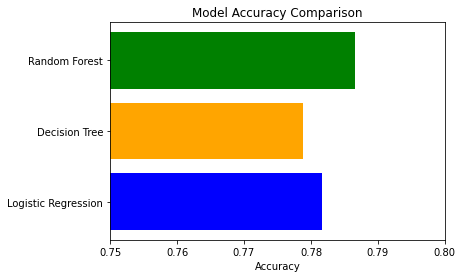

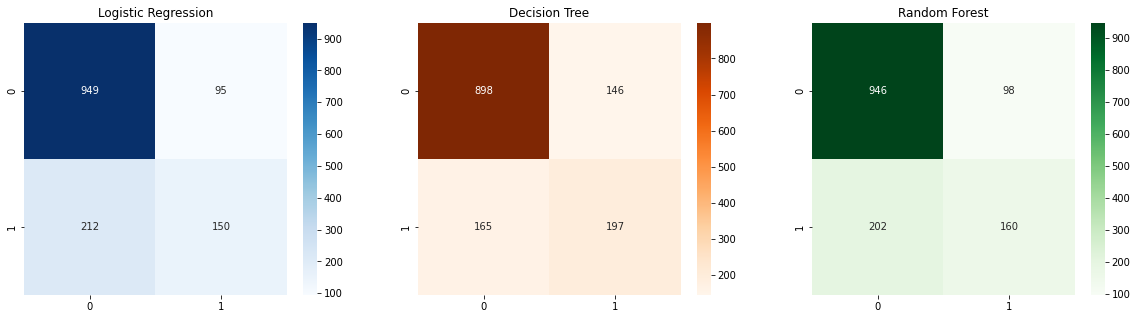

X does not have valid feature names, but LogisticRegression was fitted with feature names


TypeError: Image data of dtype object cannot be converted to float

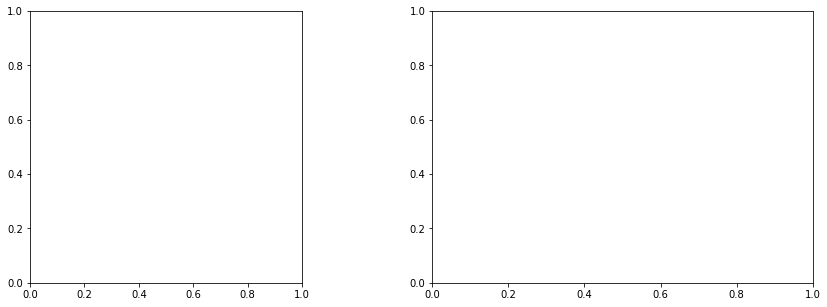

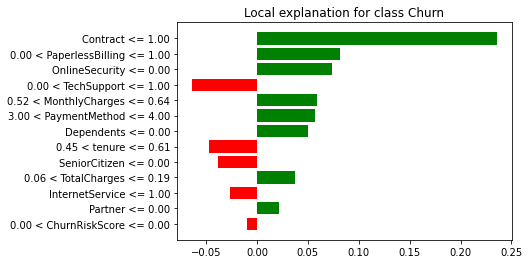

In [115]:
# Visualize all results
visualize_results(results_list)

## Improvements

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


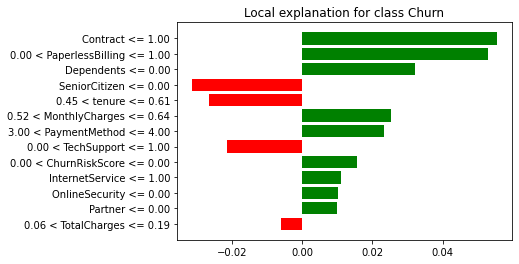

In [75]:
explainer = LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['No Churn', 'Churn'])
explanation = explainer.explain_instance(X_test.iloc[0].values, best_estimator_rf.predict_proba, num_features=len(X_train.columns))

# Get the matplotlib.pyplot figure from LimeTabularExplainer
fig = explanation.as_pyplot_figure()

# Customize the background color
fig.patch.set_facecolor('white')

# Show the modified plot
plt.show()

In [ ]:
# Visualize the Decision Tree structure
plt.figure(figsize=(150, 100), facecolor="white")
plot_tree(best_estimator_rf, feature_names=X_test.columns, class_names=['Not Churn', 'Churn'], filled=True, rounded=True)
plt.show()